# Assignment 2  <font color="blue"> (15 points) </font>

------
### Information
**Name:** Ahmed Ibrahim

**Student Number:** 261032796

**Date:** 2021-10-27

**Course Number:** YCBS 255 - Statistical Machine Learning

------

### General Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [ ]:

# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(7 points)</font>

1. **<font color=blue> (1 point) </font>** Download `Credit.csv` from <http://faculty.marshall.usc.edu/gareth-james/ISL/data.html> and upload it into this notebook. Print the first $5$ rows of the data. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results. 
2. **<font color=blue> (0.5 points)</font>** Keep only `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, and `Balance` as your variables and throw the rest of variables away. Print the dimension of this new dataset. 
3.  **<font color=blue> (0.5 points) </font>** Create a binary variable `Balance_1500` which equals $1$ for the observations with `Balance` $> 1500$, and equals $0$ otherwise.
4. **<font color=blue> (3 points) </font>** Model `Balance_1500` by the explanatory variables `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education` using the following models: 
    + logistic regression, 
    + linear discriminant, and 
    + quadratic discriminant.
5. **<font color=blue> (0.5 points) </font>** Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   | 
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

</br>
Compare the probabilities and comment.
    
6. **<font color=blue> (1.5 points) </font>** For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment. 

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
% matplotlib inline
import numpy as np

## Question A.1

In [83]:
# Question A.1: Download Credit.csv.
from google.colab import files
uploaded = files.upload()
credit_data = pd.read_csv('Credit.csv')

Saving Credit.csv to Credit (2).csv


In [84]:
# Question A.1: Print first 5 rows.
credit_data.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [85]:
# Question A.1: Get number of rows and columns.
credit_data.shape

(400, 12)

In [86]:
# Question A.1: View columns.
credit_data.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [108]:
# Question A.1: Conduct a brief data exploration.
credit_data.describe(include = 'all')

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400,400,400,400.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Female,No,Yes,Caucasian,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,207,360,245,199,NaN
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,NaN,NaN,NaN,NaN,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,NaN,NaN,NaN,NaN,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,NaN,NaN,NaN,NaN,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,NaN,NaN,NaN,NaN,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,NaN,NaN,NaN,NaN,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,NaN,NaN,NaN,NaN,863.000000


In [88]:
# Question A.1: Check for data types.
credit_data.dtypes

Unnamed: 0      int64
Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender         object
Student        object
Married        object
Ethnicity      object
Balance         int64
dtype: object

In [89]:
# Question A.1: Check for missing values.
credit_data.isna().sum()

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

In [90]:
# Question A.1: Check for null values.
credit_data.isnull().sum()

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

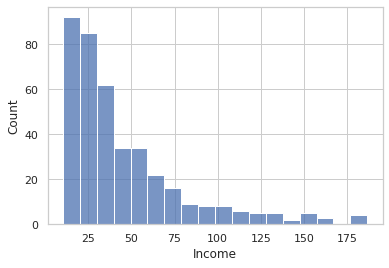

In [91]:
# Question A.1: Conduct univariate analysis for all features.
sns.histplot(x=credit_data['Income'])
plt.show()

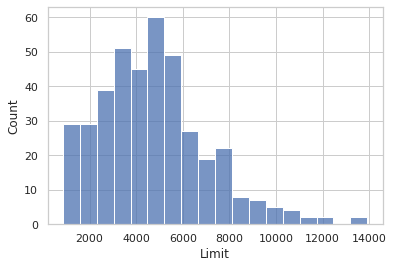

In [92]:
sns.histplot(x=credit_data['Limit'])
plt.show()

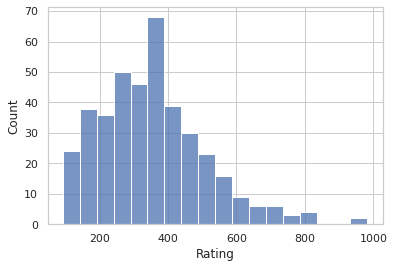

In [93]:
sns.histplot(x=credit_data['Rating'])
plt.show()

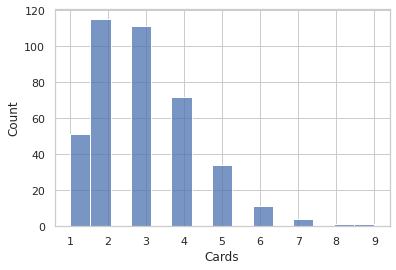

In [94]:
sns.histplot(x=credit_data['Cards'])
plt.show()

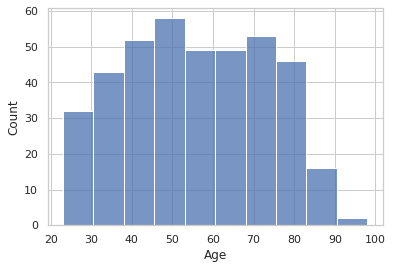

In [95]:
sns.histplot(x=credit_data['Age'])
plt.show()

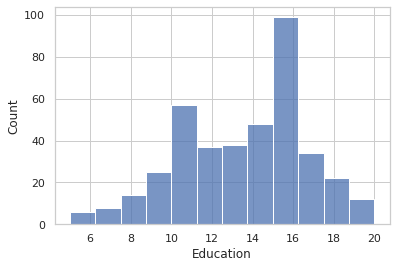

In [96]:
sns.histplot(x=credit_data['Education'])
plt.show()

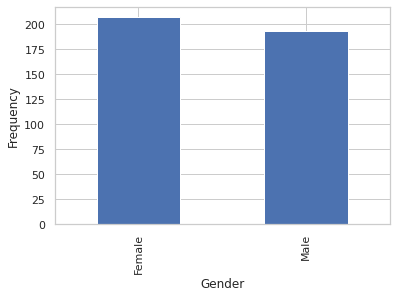

In [97]:
credit_data['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

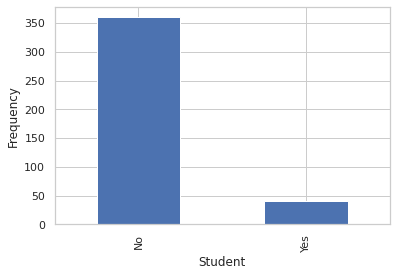

In [98]:
credit_data['Student'].value_counts().plot(kind='bar')
plt.xlabel('Student')
plt.ylabel('Frequency')
plt.show()

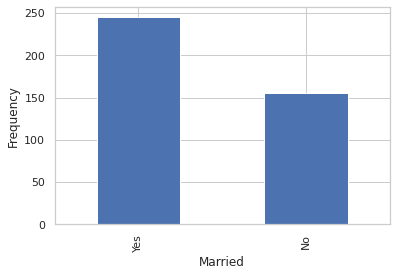

In [99]:
credit_data['Married'].value_counts().plot(kind='bar')
plt.xlabel('Married')
plt.ylabel('Frequency')
plt.show()

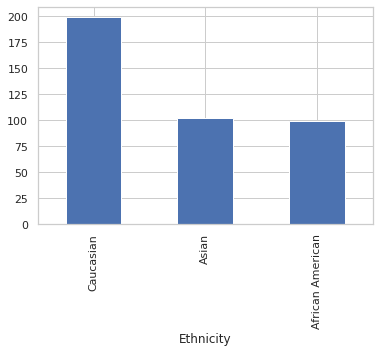

In [100]:
credit_data['Ethnicity'].value_counts().plot(kind='bar')
plt.xlabel('Ethnicity')
plt.show()

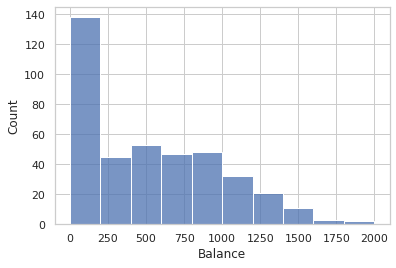

In [101]:
sns.histplot(x=credit_data['Balance'])
plt.show()

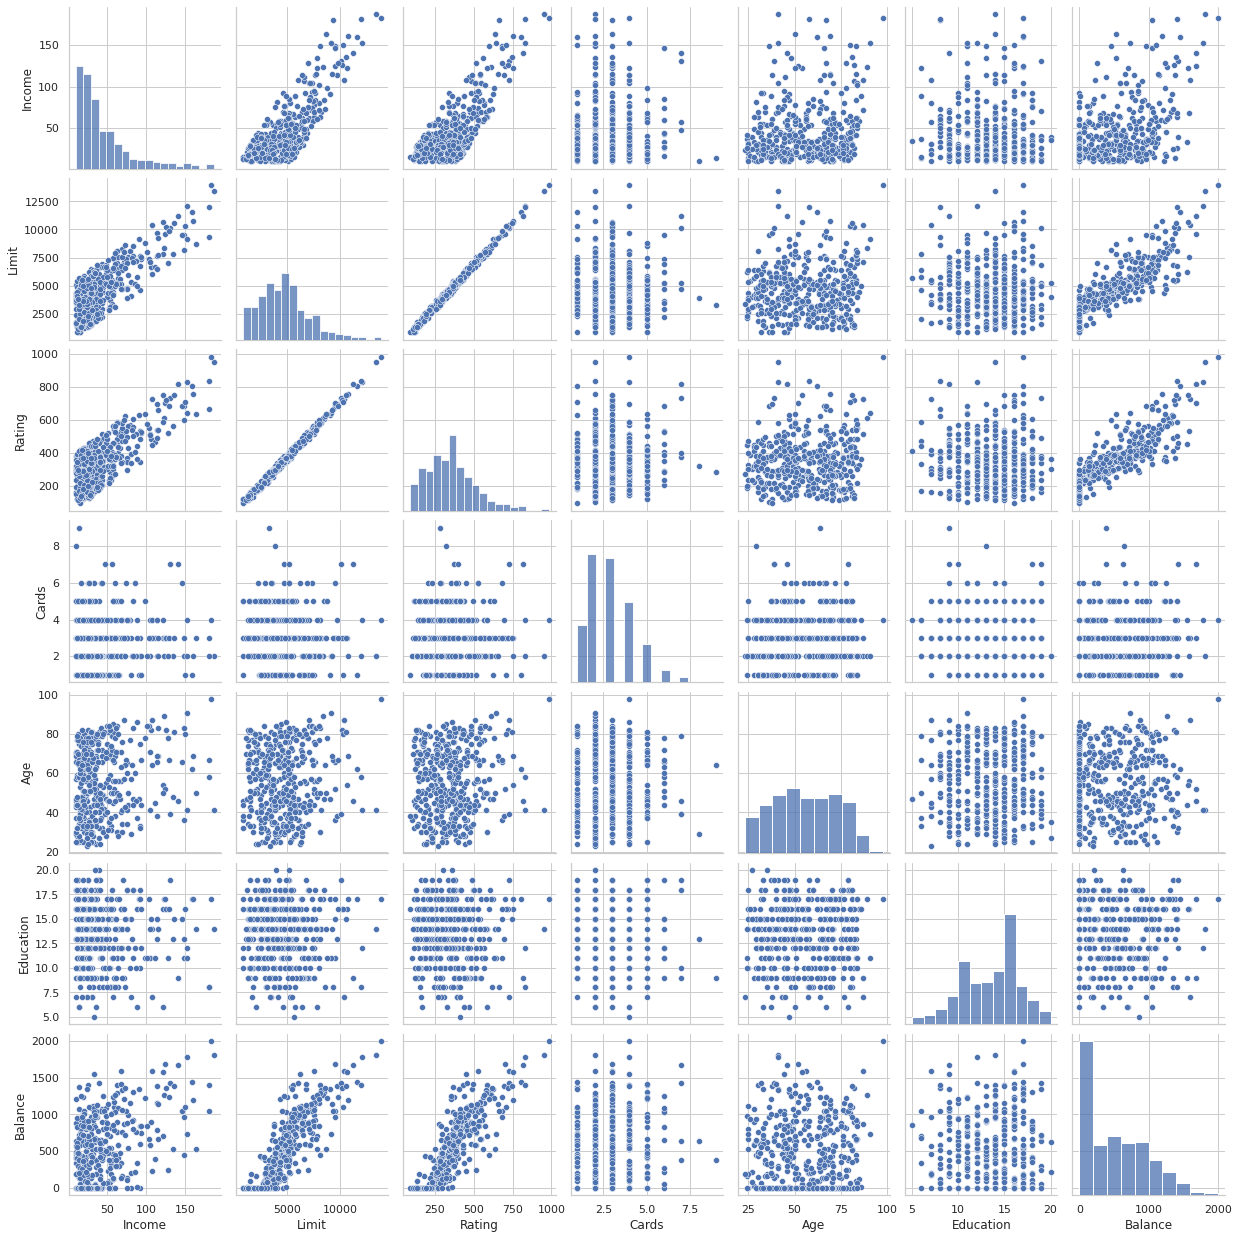

In [102]:
# Question A.1: Conduct bi-variate analysis.
credit_data = credit_data.drop('Unnamed: 0', 1)
sns.pairplot(credit_data)
plt.show()

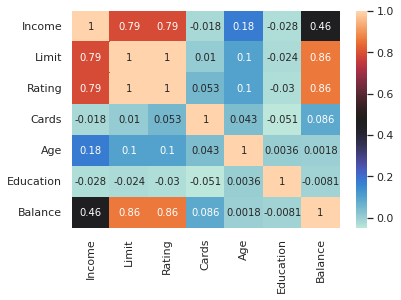

In [103]:
credit_data_corr = credit_data.corr()
sns.heatmap(credit_data_corr, 
            xticklabels = credit_data_corr.columns.values,
            yticklabels = credit_data_corr.columns.values,
            cmap='icefire',
            annot = True);
plt.show()

In [104]:
credit_data.pivot_table(index=credit_data['Gender'])

,Age,Balance,Cards,Education,Income,Limit,Rating
Gender,,,,,,,
Female,55.734300,529.536232,2.927536,13.434783,44.853928,4756.516908,356.265700
Male,55.595855,509.803109,2.989637,13.466321,45.610316,4713.165803,353.518135


In [105]:
credit_data.pivot_table(index=credit_data['Student'])

,Age,Balance,Cards,Education,Income,Limit,Rating
Student,,,,,,,
No,55.838889,480.369444,2.969444,13.375,44.988533,4740.222222,355.044444
Yes,54.125000,876.825000,2.850000,14.125,47.292050,4694.000000,354.000000


In [106]:
credit_data.pivot_table(index=credit_data['Married'])

,Age,Balance,Cards,Education,Income,Limit,Rating
Married,,,,,,,
No,57.251613,523.290323,2.974194,13.258065,43.641090,4645.303226,347.800000
Yes,54.665306,517.942857,2.946939,13.571429,46.217082,4792.726531,359.457143


In [107]:
credit_data.pivot_table(index=credit_data['Ethnicity'])

,Age,Balance,Cards,Education,Income,Limit,Rating
Ethnicity,,,,,,,
African American,57.505051,531.000000,2.959596,13.525253,47.682101,4881.595960,365.070707
Asian,53.911765,512.313725,2.970588,13.607843,44.187833,4607.823529,345.431373
Caucasian,55.653266,518.497487,2.949749,13.331658,44.521945,4728.462312,354.773869


### Question A1: Comments on data exploration.
*   All columns have an equal count of values; hence the data is balanced.
*   The dataset has 400 observations, two columns for indexes, and 11 features.
*   Only the categories have unique values, top values, and frequencies which is expected. 
*   The categories consist of: 'Gender', 'Student', 'Married', 'Ethnicity' and the numerical features are the following: 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education' and 'Balance'.
*   As for the data types, all the categories are of type 'object' and the numerical features are of type 'int64 while the 'Income' feature is of type 'float64'.
*   The dataset does not contain empty/null values.
*   Univariate studies were done on the features where histograms were used for the numerical features and bar charts for the categorical features. 
*   Histograms were used to illustrate the frequencies of various bins of the numerical features. The ‘Income’ histogram is skewed on the right-side, which makes sense that they are fewer accounts of high-income earners in the dataset. Both the ‘Limit’ and ‘Rating’ histograms show similar distributions while both resembling a chi-square distribution. Based on the ‘Cards’ histogram, most of the observations come from individuals with fewer than 5 cards. The ‘Age’ distribution hints that the age groups are quite evenly distributed except for a small portion of individuals being over the age of 80. Based on the ‘Education’ histogram, there seems a lot of individuals with 16 years of education. Also, according to the ‘Balance’ histogram, there is a large portion of individuals with balances less than 250. 
*   Based on the bar charts, there is roughly an equal number of men and women in the dataset. The predominant number of individuals used are not students and the larger portion of them are also married. About half of the dataset use Caucasians and the other half are either Asian or African American.
*   Bivariate analysis was done on the numerical features using the ‘pairplot’ and generating a heatmap with the correlation scores. Based on both, It seems the ‘Rating’ and ‘Limit’ features have a very similar distribution since they are perfectly correlated. They are both also highly correlated with the ‘Balance’ and ‘Income’ features. However, the ‘Balance’ and ‘Income’ features are negligibly correlated. The ‘Cards’, ‘Age’, ‘Education’ have almost no correlation with the rest of the features.    
*   Pivot tables were generated for all numerical features segregated by the categorical features. Average values were used for the numerical features. At first glance, the differences in the magnitude of the numerical features for each category do not seem significant. 



## Question A.2

In [109]:
# Question A.2: Generate dataframe with only the desired columns.
cdt = credit_data.drop(['Gender', 'Student', 'Married', 'Ethnicity'], axis=1, inplace=True)

In [110]:
# Question A.2: View the number of rows and columns of the trimmed dataset.
credit_data.shape

(400, 7)

## Question A.3

In [111]:
# Question A.3: a binary variable Balance_1500.
Balance_1500 = []
credit_data_balance = credit_data['Balance']

for balance in credit_data_balance:
  if balance > 1500:
    Balance_1500.append(1)
  else:
    Balance_1500.append(0)
credit_data['Balance_1500'] = Balance_1500

credit_data.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance',
       'Balance_1500'],
      dtype='object')

In [112]:
# Question A.3: print table description.
credit_data.describe(include = 'all')

,Income,Limit,Rating,Cards,Age,Education,Balance,Balance_1500
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000,0.022500
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877,0.148489
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000,0.000000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000,0.000000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000,0.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000,1.000000


In [114]:
# Question A.3: obtain counts of both values in the 'Balance_1500' category.
print(credit_data['Balance_1500'].value_counts())

0    391
1      9
Name: Balance_1500, dtype: int64


## Question A.4

In [115]:
# Question A.4: Generate logistic regression model using the 'credit_data' table.
from sklearn.linear_model import LogisticRegression
X = credit_data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
y = credit_data['Balance_1500']
lr =  LogisticRegression(solver='lbfgs',  max_iter=100000)
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
# Question A.4: Generate linear discrimant analysis model using the 'credit_data' table.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [117]:
# Question A.4: Generate quadratic discrimant analysis model using the 'credit_data' table.
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X,y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

## Question A.5

In [118]:
# Question A.5: Calculate probability for the lr model.
X_input = [63, 8100, 600, 4, 30, 13, 186, 13414, 950, 2, 41, 13]
X_pred = np.array(X_input).reshape(2,6)
print(X_pred)
probability_array_lr = lr.predict_proba(X_pred)
print(probability_array_lr)
print('\nProbability of the first value set obtaining a balance greater than 1500:', "{:.5%}".format(probability_array_lr[0][1]))
print('Probability of the second value set obtaining a balance greater than 1500:', "{:.5%}".format(probability_array_lr[1][1]))

[[   63  8100   600     4    30    13]
 [  186 13414   950     2    41    13]]
[[0.65637094 0.34362906]
 [0.05508825 0.94491175]]

Probability of the first value set obtaining a balance greater than 1500: 34.36291%
Probability of the second value set obtaining a balance greater than 1500: 94.49118%


In [119]:
# Question A.5: Calculate probability for the lda model.
probability_array_lda = lda.predict_proba(X_pred)
print(probability_array_lda)
print('\nProbability of the first value set obtaining a balance greater than 1500:', "{:.5%}".format(probability_array_lda[0][1]))
print('Probability of the second value set obtaining a balance greater than 1500:', "{:.5%}".format(probability_array_lda[1][1]))

[[0.94050988 0.05949012]
 [0.00721199 0.99278801]]

Probability of the first value set obtaining a balance greater than 1500: 5.94901%
Probability of the second value set obtaining a balance greater than 1500: 99.27880%


In [120]:
# Question A.5: Calculate probability for the qda model.
probability_array_qda = qda.predict_proba(X_pred)
print(probability_array_qda)
print('\nProbability of the first value set obtaining a balance greater than 1500:', "{:.5%}".format(probability_array_qda[0][1]))
print('Probability of the second value set obtaining a balance greater than 1500:', "{:.5%}".format(probability_array_qda[1][1]))

[[9.99999995e-01 4.93626009e-09]
 [7.83057752e-04 9.99216942e-01]]

Probability of the first value set obtaining a balance greater than 1500: 0.00000%
Probability of the second value set obtaining a balance greater than 1500: 99.92169%


### Question A.5: Comment on probabilities of models

In all three methods, for the first value set, it is estimated that the balance would be more likely to be less than 1500. However, for the second value set, it is estimated that the balance would be more likely to be above 1500. The methods classified the value sets at different magnitudes of confidence. The greatest disparity between the models occurred with the classification of the first value set, where the logistic regression had a computed probability of 34 % whereas the LDA method is 6% and the QDA was nearly zero. However, for the second value set, the disparity is significantly lower, where both discriminant analysis methods computed nearly identical probabilities.

## Question A.6

In [121]:
# Question A.6: Print the confusion matrix for the lr model. 
from sklearn.metrics import confusion_matrix
y_pred_lr = lr.predict(X)
lr_conf_matrix = confusion_matrix(y, y_pred_lr)
print('The confusing matrix for the logistic regression model:\n',lr_conf_matrix) 

The confusing matrix for the logistic regression model:
 [[391   0]
 [  3   6]]


In [122]:
# Question A.6: Print the confusion matrix for the lda model. 
y_pred_lda = lda.predict(X)
lda_conf_matrix = confusion_matrix(y, y_pred_lda)
print('The confusing matrix for the linear discriminant model:\n',lda_conf_matrix)

The confusing matrix for the linear discriminant model:
 [[383   8]
 [  4   5]]


In [123]:
# Question A.6: Print the confusion matrix for the qda model. 
y_pred_qda = qda.predict(X)
qda_conf_matrix = confusion_matrix(y, y_pred_qda)
print('The confusing matrix for the quadratic discriminant model model:\n',qda_conf_matrix)

The confusing matrix for the quadratic discriminant model model:
 [[390   1]
 [  2   7]]


In [124]:
# Question A.6: Calculate accuracy of lr model.
lr_accuracy = np.trace(lr_conf_matrix)/np.sum(lr_conf_matrix)
print('The accuracy of the logistic regression model is :', "{:.2%}".format(lr_accuracy))

The accuracy of the logistic regression model is : 99.25%


In [125]:
# Question A.6: Calculate accuracy of lda model.
lda_accuracy = np.trace(lda_conf_matrix)/np.sum(lda_conf_matrix)
print('The accuracy of the linear discriminant model is :', "{:.2%}".format(lda_accuracy))

The accuracy of the linear discriminant model is : 97.00%


In [126]:
# Question A.6: Calculate accuracy of qda model.
qda_accuracy = np.trace(qda_conf_matrix)/np.sum(qda_conf_matrix)
print('The accuracy of the linear discriminant model is :', "{:.2%}".format(qda_accuracy))

The accuracy of the linear discriminant model is : 99.25%


In [127]:
# Question A.6: Compute the AUC for the lr model.
from sklearn.metrics import roc_auc_score
lr_roc_auc_score = roc_auc_score(y, y_pred_lr)
print('The AUC score for the logistic regression model is :', "{:.2}".format(lr_roc_auc_score))

The AUC score for the logistic regression model is : 0.83


In [128]:
# Question A.6: Compute the AUC for the lda model.
lda_roc_auc_score = roc_auc_score(y, y_pred_lda)
print('The AUC score for the linear discriminant model is :', "{:.2}".format(lda_roc_auc_score))

The AUC score for the linear discriminant model is : 0.77


In [129]:
# Question A.6: Compute the AUC for the qda model.
qda_roc_auc_score = roc_auc_score(y, y_pred_qda)
print('The AUC score for the quadratic discriminant model is :', "{:.2}".format(qda_roc_auc_score))

The AUC score for the quadratic discriminant model is : 0.89


### Question A.6: Observation on method metrics

Three metrics were used to study the effectiveness of the logistic regression and discriminant analysis methods to approprietely sort the herein data. The data set contains 400 balanced observations, where only 9 contain balances greater than 1500. 

Based on the confusion matrix, only the lr model sorted the appropriate number of true positives being 391, where the qda was off by 1 with 390 and the lda with 8. The lr model also had no false positive, while the the qda had only 1 but the lda with 8. On the other hand, the highest count of true negatives belongs to the qda model with 7, followed by the lr model with 6 and the lda model with 5. The qda model also had the lowest count of false negatives being 2, followed by the lr model with 3 and the lda with 4. It seems that for this dataset the lr model is superior for detecting the balances below 1500 and the qda model is more accurate in the detecting the few balance above 1500 while the lda model is the worst for both in comparaison.

The lr and qda model yielded equal accuracies of 99.25 % and the lda model had an accuracy of 97.00 %. 

As for the AUC score, the qda model had the largest score with 0.89, the lr model had the middle score of 0.83 and the smallest area belongs to the lda model with a score of 0.77.

According to the metrics, it seems the qda model is the most performant, while the lr model has highly comparable performance while the lda model is the least favorable among the three. 


## **Part B** <font color="blue">(8 points)</font>

Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  **Athena/Content/Data**. Save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively. Explore the data in order to understand it. 

  1. **<font color="blue">(1 point)</font>** From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`. 
  2. **<font color="blue">(1 point)</font>** Project `binar_train` onto the first **two principal components** and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.
  3. **<font color="blue">(1 point)</font>** Fit a **logistic regression**, in the new space, to separate digits $2$ and $7$. 
  4. **<font color="blue">(1 point)</font>** Evaluate the trainded model on `binar_test` using **accuracy**, and an **appropriate F-measure**. 
  5. **<font color="blue">(0.5 points)</font>** Build and print a confusion matrix for your predictions.

For the rest of the questions use the **whole training data**, i.e., `ziptrain` (**not** `binar_train`). 

  6. **<font color="blue">(1 point)</font>** Project the whole data onto the first $m=2, 3, 4, 5$ principal components (one $m$ at a time).
  7. **<font color="blue">(1.5 points)</font>** For each $m$, and using **$5$-fold cross-validation**, train a **linear discriminant** classifier on `ziptrain`. 
  8. **<font color="blue">(1 point)</font>** Based on **cross-validated accuracy**, select the best number of principal components $m$.


In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Question B.1

In [147]:
# Question B1: Upload the ziptrain dataset.
from google.colab import files
uploaded = files.upload()
ziptrain = pd.read_csv('ziptrain.csv', sep = ' ', header = None)

Saving ziptrain.csv to ziptrain (5).csv


In [148]:
# Question B1: Upload the ziptest dataset.
from google.colab import files
uploaded = files.upload()
ziptest = pd.read_csv('ziptest.csv', sep=' ', header=None)

Saving ziptest.csv to ziptest (3).csv


In [149]:
# Question B1: Explore 'ziptrain'.
ziptrain.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257
count,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.00000,7291.000000,...,7291.000000,7291.00000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,0.0
mean,3.903443,-0.996417,-0.981138,-0.951153,-0.887738,-0.773468,-0.610302,-0.368991,-0.045769,-0.052641,-0.284564,-0.504106,-0.686470,-0.815202,-0.906155,-0.966003,-0.993361,-0.989543,-0.951333,-0.865323,-0.695869,-0.433805,-0.143438,0.130668,0.411824,0.414775,0.148829,-0.074258,-0.347208,-0.613922,-0.800062,-0.918401,-0.978985,-0.982769,-0.927405,-0.800574,-0.549837,-0.233383,-0.02355,0.066067,...,0.037484,-0.07682,-0.222290,-0.471018,-0.722742,-0.881652,-0.965255,-0.981477,-0.926496,-0.805319,-0.583138,-0.297517,-0.065228,0.180895,0.490344,0.485738,0.138089,-0.180418,-0.474683,-0.719734,-0.869122,-0.938532,-0.980175,-0.996650,-0.982770,-0.951050,-0.877880,-0.733815,-0.502333,-0.198547,0.139823,0.116439,-0.314108,-0.653711,-0.837858,-0.922194,-0.957393,-0.979290,-0.994678,NaN
std,2.996386,0.051713,0.151202,0.244264,0.360516,0.502659,0.628710,0.716032,0.768304,0.752979,0.746838,0.685929,0.585275,0.475096,0.339153,0.196063,0.075268,0.102599,0.256221,0.428142,0.617352,0.780501,0.859741,0.836110,0.753915,0.738774,0.826137,0.861812,0.810964,0.691302,0.526852,0.336121,0.153297,0.137188,0.314622,0.508486,0.715712,0.836387,0.86105,0.815777,...,0.815794,0.88242,0.870199,0.777071,0.595122,0.398245,0.197642,0.143792,0.317406,0.498765,0.694929,0.838916,0.894148,0.831613,0.722208,0.716934,0.854526,0.872639,0.763985,0.588905,0.419867,0.292377,0.148805,0.047137,0.139592,0.236966,0.373128,0.524789,0.678467,0.772895,0.752984,0.757336,0.725859,0.582555,0.414646,0.300830,0.228700,0.158998,0.066056,NaN
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
25%,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999000,-0.950000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.904000,-0.100500,-0.053500,-0.848500,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-0.870000,...,-0.896000,-1.00000,-1.000000,-1.000000,-1.000000,-1

In [150]:
# Question B1: Remove column '257' from the dataset as it a column of nulls.
ziptrain = ziptrain.drop(257, axis = 1)
ziptrain.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
count,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.00000,7291.000000,...,7291.000000,7291.000000,7291.00000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000
mean,3.903443,-0.996417,-0.981138,-0.951153,-0.887738,-0.773468,-0.610302,-0.368991,-0.045769,-0.052641,-0.284564,-0.504106,-0.686470,-0.815202,-0.906155,-0.966003,-0.993361,-0.989543,-0.951333,-0.865323,-0.695869,-0.433805,-0.143438,0.130668,0.411824,0.414775,0.148829,-0.074258,-0.347208,-0.613922,-0.800062,-0.918401,-0.978985,-0.982769,-0.927405,-0.800574,-0.549837,-0.233383,-0.02355,0.066067,...,0.255638,0.037484,-0.07682,-0.222290,-0.471018,-0.722742,-0.881652,-0.965255,-0.981477,-0.926496,-0.805319,-0.583138,-0.297517,-0.065228,0.180895,0.490344,0.485738,0.138089,-0.180418,-0.474683,-0.719734,-0.869122,-0.938532,-0.980175,-0.996650,-0.982770,-0.951050,-0.877880,-0.733815,-0.502333,-0.198547,0.139823,0.116439,-0.314108,-0.653711,-0.837858,-0.922194,-0.957393,-0.979290,-0.994678
std,2.996386,0.051713,0.151202,0.244264,0.360516,0.502659,0.628710,0.716032,0.768304,0.752979,0.746838,0.685929,0.585275,0.475096,0.339153,0.196063,0.075268,0.102599,0.256221,0.428142,0.617352,0.780501,0.859741,0.836110,0.753915,0.738774,0.826137,0.861812,0.810964,0.691302,0.526852,0.336121,0.153297,0.137188,0.314622,0.508486,0.715712,0.836387,0.86105,0.815777,...,0.778680,0.815794,0.88242,0.870199,0.777071,0.595122,0.398245,0.197642,0.143792,0.317406,0.498765,0.694929,0.838916,0.894148,0.831613,0.722208,0.716934,0.854526,0.872639,0.763985,0.588905,0.419867,0.292377,0.148805,0.047137,0.139592,0.236966,0.373128,0.524789,0.678467,0.772895,0.752984,0.757336,0.725859,0.582555,0.414646,0.300830,0.228700,0.158998,0.066056
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999000,-0.950000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.904000,-0.100500,-0.053500,-0.848500,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-0.870000,...,-0.521500,-0.896000,-1.0000

In [151]:
ziptest.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,...,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,3.850523,-0.996595,-0.977925,-0.949133,-0.882643,-0.771821,-0.589944,-0.353905,-0.061801,-0.076219,-0.308739,-0.518496,-0.703213,-0.835574,-0.914028,-0.963754,-0.992842,-0.987400,-0.950114,-0.863019,-0.685002,-0.422540,-0.142319,0.138084,0.410216,0.394533,0.142762,-0.102543,-0.366483,-0.638499,-0.818731,-0.915968,-0.979422,-0.978827,-0.925596,-0.799751,-0.534323,-0.203623,0.014783,0.111163,...,0.319405,0.135668,-0.026038,-0.185679,-0.450152,-0.715409,-0.879855,-0.965728,-0.982025,-0.933871,-0.819435,-0.578299,-0.266218,-0.031700,0.202982,0.507346,0.501157,0.178248,-0.149349,-0.453611,-0.707299,-0.862858,-0.941614,-0.983645,-0.997508,-0.984768,-0.955224,-0.883514,-0.729210,-0.471569,-0.170607,0.133865,0.110366,-0.314661,-0.636191,-0.817464,-0.912635,-0.960662,-0.984057,-0.995801
std,3.018484,0.042205,0.168974,0.245463,0.368629,0.499981,0.646510,0.730745,0.773948,0.764625,0.749252,0.672256,0.563895,0.444534,0.332702,0.217114,0.076394,0.115428,0.266761,0.423410,0.633438,0.785688,0.861664,0.836512,0.769457,0.761544,0.827916,0.863507,0.811423,0.668741,0.508217,0.345123,0.148101,0.162272,0.323694,0.506488,0.722542,0.848965,0.871122,0.817115,...,0.769513,0.814499,0.889629,0.885694,0.789716,0.599444,0.410274,0.188656,0.143124,0.298993,0.473005,0.693461,0.847967,0.905452,0.834008,0.722686,0.724319,0.839891,0.878094,0.769048,0.611003,0.433818,0.281454,0.131543,0.045357,0.120885,0.230414,0.360226,0.521545,0.690894,0.790514,0.760779,0.756387,0.717573,0.592921,0.451498,0.316113,0.220893,0.130031,0.055080
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.997000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.899000,-0.148500,-0.148500,-0.882000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.816000,...,-0.374500,-0.775500

In [152]:
# Question B1: Create sub-dataset of 'ziptrain' with digit 2.
ziptrain_digit_2 = ziptrain.loc[ziptrain[0] == 2]
ziptrain_digit_2.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
count,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.0,-0.992488,-0.960391,-0.902576,-0.799346,-0.603462,-0.373672,-0.195773,-0.152778,-0.320365,-0.624383,-0.858391,-0.960129,-0.990372,-0.997293,-0.999654,-1.0,-0.980308,-0.880473,-0.702208,-0.409492,-0.025799,0.227543,0.329394,0.310584,0.188607,-0.092543,-0.474547,-0.790123,-0.932882,-0.983469,-0.994836,-1.0,-0.955891,-0.802834,-0.545410,-0.141168,0.162224,0.235049,0.184666,...,-0.064922,-0.170661,-0.214518,-0.172676,-0.162412,-0.250977,-0.446146,-0.760055,-0.858383,-0.539309,-0.195933,0.004877,0.063279,0.013514,-0.105389,-0.250989,-0.397063,-0.509114,-0.530732,-0.441465,-0.375391,-0.439124,-0.589631,-0.831639,-0.972290,-0.877174,-0.724031,-0.541821,-0.417986,-0.441672,-0.552854,-0.681235,-0.781535,-0.836428,-0.842494,-0.795569,-0.718192,-0.723185,-0.825242,-0.948852
std,0.0,0.071347,0.215860,0.345920,0.465230,0.619058,0.737431,0.781052,0.812472,0.765502,0.607336,0.389620,0.192445,0.090521,0.041943,0.007841,0.0,0.125555,0.388753,0.608105,0.773072,0.851276,0.833240,0.802279,0.812961,0.843611,0.852329,0.729866,0.512980,0.285636,0.152508,0.075835,0.0,0.209366,0.496724,0.700195,0.822033,0.810585,0.796519,0.815427,...,0.868894,0.846533,0.835518,0.824326,0.822816,0.817212,0.754000,0.482903,0.388304,0.707891,0.833032,0.853483,0.860731,0.877174,0.877219,0.859886,0.810077,0.764633,0.743687,0.792430,0.815313,0.776338,0.683228,0.412887,0.132942,0.364450,0.532456,0.678275,0.753732,0.755818,0.688452,0.597334,0.499153,0.433036,0.442192,0.480079,0.560434,0.558795,0.443932,0.201231
min,2.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.830500,-0.433500,-0.576000,-0.957000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-0.756000,-0.616000,-0.760500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,

In [153]:
# Question B1: Create sub-dataset of 'ziptrain' with digit 7.
ziptrain_digit_7 = ziptrain.loc[ziptrain[0] == 7]
ziptrain_digit_7.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
count,645.0,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.00000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,...,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.0,645.0,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.0,645.0,645.0,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.0,645.0,645.0
mean,7.0,-0.974916,-0.879817,-0.763946,-0.603887,-0.417952,-0.296960,-0.237640,-0.204478,-0.142487,-0.085837,-0.036777,-0.120530,-0.365226,-0.637428,-0.866253,-0.976522,-0.935271,-0.758456,-0.514426,-0.14495,0.227169,0.454953,0.516741,0.512687,0.518259,0.518085,0.546042,0.490301,0.163242,-0.275899,-0.659264,-0.908584,-0.919048,-0.759372,-0.488231,-0.096172,0.255169,0.344828,0.258577,...,0.513324,-0.385777,-0.900676,-0.983828,-0.994899,-0.999873,-1.0,-1.0,-0.999781,-0.997699,-0.996081,-0.983614,-0.922349,-0.713955,-0.077789,0.484101,0.197383,-0.610772,-0.939778,-0.990384,-0.998868,-1.0,-1.0,-1.0,-0.999433,-0.997513,-0.996474,-0.981870,-0.946074,-0.801921,-0.353008,0.071310,-0.253135,-0.807352,-0.976025,-0.995406,-0.999184,-1.0,-1.0,-1.0
std,0.0,0.134030,0.381581,0.515852,0.614917,0.684733,0.696746,0.711328,0.714630,0.727495,0.741487,0.752361,0.764651,0.737108,0.611636,0.375266,0.131532,0.255715,0.552141,0.741325,0.83553,0.808060,0.714706,0.677550,0.666973,0.676544,0.678768,0.667401,0.699490,0.840073,0.837156,0.638296,0.311189,0.295038,0.557594,0.732735,0.813161,0.775171,0.743182,0.750869,...,0.642582,0.696404,0.340724,0.148663,0.088531,0.002282,0.0,0.0,0.005552,0.058432,0.079448,0.143752,0.326237,0.576162,0.798344,0.698287,0.770797,0.614525,0.264622,0.107071,0.023183,0.0,0.0,0.0,0.014411,0.063157,0.056618,0.155771,0.249104,0.464094,0.680666,0.713461,0.720966,0.428783,0.170422,0.076609,0.020711,0.0,0.0,0.0
min,7.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0
25%,7.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.984000,-0.961000,-0.996000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-0.673000,0.012000,0.169000,0.153000,0.176000,0.166000,0.306000,0.115000,-0.907000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.995000,-0.494000,-0.266000,-0.391000,...,0.165000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.983000,0.057000,-0.631000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.679000,-1.00

In [154]:
# Question B1: Create sub-dataset of 'ziptest' with digit 2.
ziptest_digit_2 = ziptest.loc[ziptest[0] == 2]
ziptest_digit_2.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
count,198.0,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,2.0,-0.992672,-0.950384,-0.898631,-0.805237,-0.636086,-0.369172,-0.190015,-0.235263,-0.423919,-0.665449,-0.853439,-0.954874,-0.991444,-0.989879,-0.990359,-0.998697,-0.970051,-0.890086,-0.692914,-0.450263,-0.091136,0.246116,0.333293,0.295621,0.107944,-0.114500,-0.487899,-0.811424,-0.938475,-0.976475,-0.989460,-0.999611,-0.948227,-0.848525,-0.621010,-0.271101,0.128717,0.233222,0.143187,...,-0.005611,-0.038944,-0.065581,-0.085838,-0.075025,-0.258303,-0.492869,-0.786737,-0.863081,-0.624061,-0.357323,-0.068960,0.086874,0.066116,-0.023990,-0.132530,-0.264641,-0.363056,-0.403545,-0.347894,-0.369934,-0.492323,-0.680611,-0.875247,-0.989692,-0.910838,-0.755808,-0.589778,-0.465672,-0.417596,-0.495247,-0.612187,-0.71451,-0.791995,-0.808874,-0.736551,-0.718040,-0.775753,-0.876131,-0.961146
std,0.0,0.069044,0.255823,0.347178,0.452314,0.614297,0.736388,0.791650,0.785994,0.743938,0.589602,0.422471,0.199662,0.072445,0.141138,0.135667,0.018335,0.163325,0.393578,0.609608,0.773726,0.833547,0.836366,0.839806,0.833353,0.848313,0.865803,0.731842,0.483741,0.270270,0.185123,0.135287,0.005472,0.248987,0.445356,0.653219,0.771913,0.840129,0.833552,0.786060,...,0.856561,0.875606,0.885201,0.890026,0.852000,0.817046,0.735835,0.452829,0.373478,0.687683,0.782433,0.850292,0.857638,0.876015,0.898309,0.895257,0.872499,0.823316,0.799984,0.846373,0.849725,0.761522,0.617559,0.349625,0.062866,0.277665,0.535631,0.659154,0.705680,0.765222,0.729475,0.652633,0.56057,0.487423,0.453067,0.545692,0.575445,0.530535,0.360805,0.168725
min,2.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.819750,-0.613750,-0.678000,-0.922250,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.934500,-0.685250,-0.589500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.

In [155]:
# Question B1: Create sub-dataset of 'ziptest' with digit 7.
ziptest_digit_7 = ziptest.loc[ziptest[0] == 7]
ziptest_digit_7.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
count,147.0,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,...,147.000000,147.000000,147.000000,147.000000,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.0,147.0,147.0,147.0
mean,7.0,-0.987728,-0.911925,-0.803735,-0.632000,-0.489837,-0.330918,-0.284041,-0.247619,-0.200381,-0.180952,-0.130939,-0.165687,-0.329918,-0.637374,-0.905925,-0.994293,-0.955973,-0.842871,-0.586701,-0.185327,0.174571,0.431102,0.484082,0.458993,0.495088,0.502435,0.494075,0.455075,0.223646,-0.254109,-0.684401,-0.963728,-0.960245,-0.800184,-0.483218,-0.025061,0.334224,0.448884,0.321565,...,0.533000,-0.241707,-0.831184,-0.972510,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.992265,-0.938599,-0.707680,-0.027463,0.480510,0.257054,-0.530435,-0.914619,-0.993524,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.988204,-0.941551,-0.797082,-0.324503,0.089333,-0.207048,-0.779224,-0.952340,-0.992340,-1.0,-1.0,-1.0,-1.0
std,0.0,0.082386,0.332590,0.468834,0.599217,0.633855,0.701430,0.711389,0.732930,0.760131,0.743673,0.736951,0.745441,0.754541,0.579615,0.304694,0.033827,0.228957,0.457095,0.649408,0.862481,0.797190,0.763091,0.709633,0.736731,0.720045,0.729577,0.741210,0.722701,0.829981,0.830263,0.594719,0.148937,0.218755,0.492585,0.713915,0.834827,0.735884,0.683041,0.760492,...,0.656691,0.747735,0.429679,0.153174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061088,0.262424,0.576508,0.816910,0.686327,0.785766,0.669851,0.311198,0.058948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087023,0.295834,0.455744,0.696071,0.723328,0.714535,0.494096,0.248469,0.079724,0.0,0.0,0.0,0.0
min,7.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
25%,7.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.997000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.716000,-0.069000,0.201500,0.009000,0.116500,0.255000,0.212500,0.037000,-0.820000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.987000,-0.115000,-0.037500,-0.380500,...,0.202500,-0.997500,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-0.978000,0.122500,-0.531500,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-0.739500,-0.992500,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
50%,7.0,-1.000000,-1.000000,-1.000000,-1.000000,-0.906000,-0.598000,-0.482000,-0.455000,-0.454000,-0.285000,-0.079000,-0.237000,-0.759000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000

In [156]:
# Question B1: Create 'binar_train'.
binar_train = pd.concat([ziptrain_digit_2, ziptrain_digit_7], sort = False)
binar_train.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
count,1376.00000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,...,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000
mean,4.34375,-0.984251,-0.922622,-0.837593,-0.707725,-0.516504,-0.337713,-0.215398,-0.177012,-0.236985,-0.371940,-0.473259,-0.566567,-0.697335,-0.828606,-0.937122,-0.988995,-0.959197,-0.823278,-0.614185,-0.285488,0.092780,0.334142,0.417213,0.405320,0.343132,0.193689,0.003854,-0.189924,-0.419074,-0.651796,-0.837536,-0.957149,-0.938621,-0.782461,-0.518608,-0.120076,0.205792,0.286508,0.219312,...,0.206131,-0.271496,-0.536155,-0.552903,-0.552640,-0.602022,-0.705765,-0.872529,-0.924664,-0.754180,-0.571002,-0.458478,-0.398734,-0.327487,-0.092451,0.093584,-0.118416,-0.556766,-0.722472,-0.698771,-0.667646,-0.702035,-0.781991,-0.910558,-0.985013,-0.933583,-0.851739,-0.748094,-0.665528,-0.610539,-0.459176,-0.328480,-0.533847,-0.822799,-0.905086,-0.889243,-0.849907,-0.852942,-0.907160,-0.972828
std,2.49602,0.105798,0.307493,0.439262,0.549117,0.656989,0.719407,0.749200,0.768320,0.752911,0.724993,0.716893,0.684968,0.596838,0.456531,0.265376,0.090777,0.198749,0.476163,0.680080,0.813450,0.840538,0.787867,0.751985,0.754594,0.786952,0.833303,0.866608,0.881725,0.820528,0.682171,0.471102,0.217803,0.253732,0.526387,0.715940,0.817897,0.795249,0.773641,0.786409,...,0.823130,0.786853,0.736427,0.731491,0.731996,0.703084,0.615040,0.371690,0.291629,0.565691,0.728647,0.799945,0.827810,0.834183,0.840978,0.869248,0.845414,0.699894,0.606732,0.643304,0.670848,0.631169,0.538326,0.312363,0.098305,0.275671,0.412936,0.551244,0.632595,0.660686,0.691796,0.754303,0.667315,0.431136,0.349080,0.367509,0.432005,0.429968,0.335022,0.148830
min,2.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.984500,-0.398250,-0.098250,-0.092000,-0.350000,-0.845500,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.641250,-0.487000,-0.597250,...,-0.783750,-1.000000,-1

In [157]:
# Question B1: Create 'binar_test'.
binar_test = pd.concat([ziptest_digit_2, ziptest_digit_7], sort = False)
binar_test.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,...,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.00000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,4.130435,-0.990565,-0.933997,-0.858197,-0.731423,-0.573771,-0.352872,-0.230078,-0.240528,-0.328672,-0.459012,-0.545591,-0.618612,-0.709577,-0.839681,-0.954383,-0.996820,-0.964052,-0.869968,-0.647658,-0.337377,0.022078,0.324936,0.397542,0.365232,0.272901,0.148368,-0.069493,-0.271786,-0.443310,-0.668684,-0.859478,-0.984322,-0.953348,-0.827928,-0.562299,-0.166267,0.216281,0.325113,0.219191,...,0.223884,-0.125339,-0.391794,-0.463638,-0.469145,-0.574330,-0.708951,-0.877606,-0.92142,-0.784243,-0.631159,-0.462368,-0.350067,-0.263588,-0.025470,0.128678,-0.042354,-0.434374,-0.621307,-0.622988,-0.638397,-0.708638,-0.816699,-0.928403,-0.994084,-0.948829,-0.859855,-0.759542,-0.668438,-0.579290,-0.422496,-0.313278,-0.498287,-0.786554,-0.870003,-0.845539,-0.838180,-0.871301,-0.928910,-0.977701
std,2.476125,0.074944,0.291186,0.405616,0.526227,0.625995,0.720914,0.758852,0.762772,0.757910,0.700980,0.678773,0.641417,0.593267,0.429496,0.227357,0.026133,0.193838,0.421820,0.628152,0.822047,0.827606,0.810016,0.789428,0.796629,0.817876,0.865182,0.881124,0.865484,0.815729,0.663450,0.428273,0.098729,0.236322,0.465982,0.682151,0.807383,0.802742,0.779305,0.779176,...,0.821184,0.828517,0.819052,0.810192,0.790908,0.719174,0.610860,0.358585,0.29065,0.552705,0.672226,0.790378,0.841639,0.852864,0.863342,0.866648,0.874498,0.765177,0.686773,0.716894,0.714736,0.628738,0.493380,0.271697,0.047847,0.214713,0.422995,0.539410,0.614708,0.677354,0.719393,0.765944,0.678088,0.489602,0.385750,0.435057,0.457308,0.416559,0.279846,0.129125
min,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980000,-0.531000,-0.193000,-0.323000,-0.663000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.674000,-0.390000,-0.492000,...,-0.736000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-

## Question B.2

In [158]:
# Question B.2: Project PCA of 2 components and remove first column.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
binar_train_nolabel = binar_train.iloc[:, 1:]
pca.fit(binar_train_nolabel)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<function matplotlib.pyplot.show>

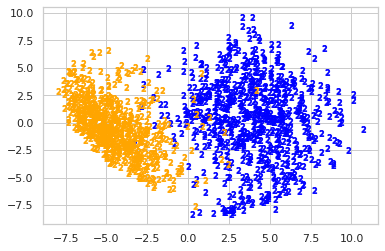

In [159]:
# Question B.2: Plot scatterplot.
Z = pca.transform(binar_train_nolabel)
plt.scatter(Z[binar_train.iloc[:, 0] == 2, 0], Z[binar_train.iloc[:, 0] == 2, 1],
            marker = '$2$',
            color = 'blue',
            alpha = 0.9)
plt.scatter(Z[binar_train.iloc[:, 0] == 7, 0], Z[binar_train.iloc[:, 0] == 7, 1],
            marker = '$2$',
            color = 'orange',
            alpha = 0.9)
plt.show

### Question B.2: Comments on scatter plot.
It seems that using 2 components resulted in two distinct clusters with some minor overlaps. Thus, 2 components is enough to seperate the digits 2 and 7.

## Question B.3

In [161]:
# Question B.3: Fit a logistic regression.
from sklearn.linear_model import LogisticRegression
y_binar_train = binar_train.iloc[:, 0]
lr_pca = LogisticRegression()
lr_pca.fit(Z, y_binar_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question B.4

In [162]:
# Question B.4: Compute accuracy score with 'binar_test'.
from sklearn.metrics import accuracy_score
binar_test_nolabel = binar_test.iloc[:, 1:]
Z_test = pca.transform(binar_test_nolabel)
y_binar_test = binar_test.iloc[:, 0]
y_pred_pca = lr_pca.predict(Z_test)
accu_test = accuracy_score(y_binar_test, y_pred_pca)
print('The accuracy of the logistic regression using pca is :', "{:.2%}".format(accu_test))

The accuracy of the logistic regression using pca is : 96.52%


In [163]:
# Question B.4: Compute f1-score with 'binar_test'.
from sklearn.metrics import f1_score
f1_test = f1_score(y_binar_test, y_pred_pca, pos_label = 7)
print('The f1-score of the logistic regression using pca is :', "{:.2%}".format(f1_test))

The f1-score of the logistic regression using pca is : 95.89%


### Question B.4: Evaluate using the accuracy score and f1-score.

Based on an accuracy score of 96.25 % and a F1-score of 95.89 %, the trained model is quite performant.

## Question B.5

In [139]:
# Question B.5: Construct and print a confusion matrix.
from sklearn.metrics import confusion_matrix
lr_pca_test = confusion_matrix(y_binar_test, y_pred_pca)
print('The confusing matrix of the logistic regression using pca:\n', lr_pca_test)

The confusing matrix of the logistic regression using pca:
 [[193   5]
 [  7 140]]


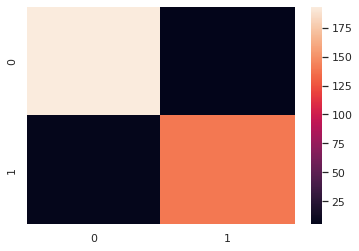

In [141]:
# Question B.5: Heatmap for confusing matrix.
sns.heatmap(lr_pca_test);
plt.show()

## Question B.6

In [164]:
# Question B.6: Project 'ziptrain' with 2 to 5 components.
for component in range(2, 6):
  pca_m = PCA(n_components = component)
  ziptrain_nolabel = ziptrain.iloc[:, 1:]
  pca_m.fit(ziptrain_nolabel)
  Z_ziptrain =  pca_m.transform(ziptrain_nolabel)
  y_ziptrain = ziptrain.iloc[:, 0]
  lr_pca_zip = LogisticRegression(solver='lbfgs',  max_iter=100000)
  lr_pca_zip.fit(Z_ziptrain, y_ziptrain)
  ziptest_nolabel = ziptest.iloc[:, 1:]
  Z_ziptest = pca_m.transform(ziptest_nolabel)
  y_pred_zip = lr_pca_zip.predict(Z_ziptest)
  y_ziptest = ziptest.iloc[:, 0]
  accu_zip = accuracy_score(y_ziptest, y_pred_zip)
  print('\nThe number of component: ', component)
  print('The accuracy of the herein logistic regression using pca is :\n', "{:.2%}".format(accu_zip))


The number of component:  2
The accuracy of the herein logistic regression using pca is :
 51.82%

The number of component:  3
The accuracy of the herein logistic regression using pca is :
 57.25%

The number of component:  4
The accuracy of the herein logistic regression using pca is :
 69.86%

The number of component:  5
The accuracy of the herein logistic regression using pca is :
 72.60%


## Question B.7

In [165]:
# Question B.7: Train lda model with cross validation and pca.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

for component in range(2, 6):
  pca_m_cross = PCA(n_components = component, svd_solver='full')
  pca_m_cross.fit(ziptrain_nolabel)
  Z_ziptrain =  pca_m_cross.transform(ziptrain_nolabel)
  lda_pca_zip = LinearDiscriminantAnalysis()
  lda_pca_zip.fit(Z_ziptrain, y_ziptrain)
  accuracy_cv = cross_val_score(lda_pca_zip, Z_ziptrain, y_ziptrain, cv = 5, scoring = 'balanced_accuracy')
  avg_accuracy_cv = accuracy_cv.mean()
  print('\nThe number of component: ', component)
  print('The average 5-fold cross-validation accuracy of the herein linear discriminant using pca is :\n', "{:.2%}".format(avg_accuracy_cv))



The number of component:  2
The average 5-fold cross-validation accuracy of the herein linear discriminant using pca is :
 48.48%

The number of component:  3
The average 5-fold cross-validation accuracy of the herein linear discriminant using pca is :
 53.60%

The number of component:  4
The average 5-fold cross-validation accuracy of the herein linear discriminant using pca is :
 66.64%

The number of component:  5
The average 5-fold cross-validation accuracy of the herein linear discriminant using pca is :
 69.55%


## Question B.8

### Question B.8: Choice of several components.

The cross-validation accuracy was computed in the previous question and printed for every component used. The accuracy increased with the number of components; the lowest being 48.48 % with 2 components and the highest being 69.55% with 5 components. The model to be selected is the one with 5 components.
